In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-10-16 00:31:25.249306: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Funciones de activación
def map_logistico(x_t):
    x_sig= 4 * x_t * (1-x_t)
    return x_sig

# Genero entradas y salidas del mapeo logístico
def generate_data(num_samples):
    x = np.random.uniform(0,1, num_samples)  # Inicializa valores aleatorios entre 0 y 10
    y = np.zeros((num_samples, 1))
    for t in range(num_samples - 1):
        y[t] = 4 * x[t] * (1 - x[t])
        x[t + 1] = y[t]
    return x[:-1].reshape(-1, 1), y[1:]  # Retorna X e y

In [5]:
def train(x_train, y_train, x_val, y_val, max_epochs, lr):
    # Inicializo wm
    inputs  = tf.keras.Input(shape=(x_train.shape[1], ), name="Input")
    layer_1 = tf.keras.layers.Dense(5, activation='sigmoid')(inputs)
    concat  = tf.keras.layers.Concatenate()([inputs, layer_1])
    outputs = tf.keras.layers.Dense(1, activation='linear')(concat)
    
    # Entreno la red
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='mean_squared_error', metrics=['accuracy'])
    
    # Comparo con el modelo
    history = model.fit(x_train, y_train, epochs=max_epochs, verbose=0, validation_data=(x_val, y_val))

    return history, model

In [19]:
# Ejemplo
lr = 0.05
max_epochs = 1000
np.random.seed(42)
tf.random.set_seed(42)

# Entreno la red de N = 5
N_examples = 5
x_5 = np.random.uniform(0,1,(N_examples,1))
Y_5 = map_logistico(x_5)
x_val_5 = np.linspace(0,1,1000).reshape(1000,1)
Y_val_5 = map_logistico(x_val_5)

hist_5, model_5 = train(x_5, Y_5, x_val_5, Y_val_5, max_epochs, lr)

# Entreno la red de N = 10
N_examples = 10
x_10 = np.random.uniform(0,1,(N_examples,1))
Y_10 = map_logistico(x_10)
x_val_10 = np.linspace(0,1,1000).reshape(1000,1)
Y_val_10 = map_logistico(x_val_10)

hist_10, model_10 = train(x_10, Y_10, x_val_10, Y_val_10, max_epochs, lr)

# Entreno la red de N = 100
N_examples = 100
x_100 = np.random.uniform(0,1,(N_examples,1))
Y_100 = map_logistico(x_100)
x_val_100 = np.linspace(0,1,1000).reshape(1000,1)
Y_val_100 = map_logistico(x_val_100)

hist_100, model_100 = train(x_100, Y_100, x_val_100, Y_val_100, max_epochs, lr)

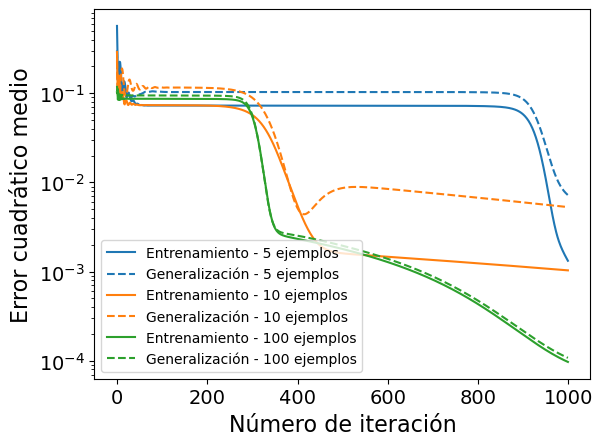

In [22]:
plt.plot(hist_5.history['loss'], label='Entrenamiento - 5 ejemplos', color='#1f77b4')
plt.plot(hist_5.history['val_loss'], '--', label='Generalización - 5 ejemplos', color='#1f77b4')
plt.plot(hist_10.history['loss'], label='Entrenamiento - 10 ejemplos', color='#ff7f0e')
plt.plot(hist_10.history['val_loss'], '--', label='Generalización - 10 ejemplos', color='#ff7f0e')
plt.plot(hist_100.history['loss'], label='Entrenamiento - 100 ejemplos', color='#2ca02c')
plt.plot(hist_100.history['val_loss'], '--', label='Generalización - 100 ejemplos', color='#2ca02c')

plt.xlabel('Número de iteración', fontsize=16)
plt.ylabel('Error cuadrático medio', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.yscale('log')
plt.legend()
#plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 4/figuras/3_SME.png', dpi=300, bbox_inches='tight')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


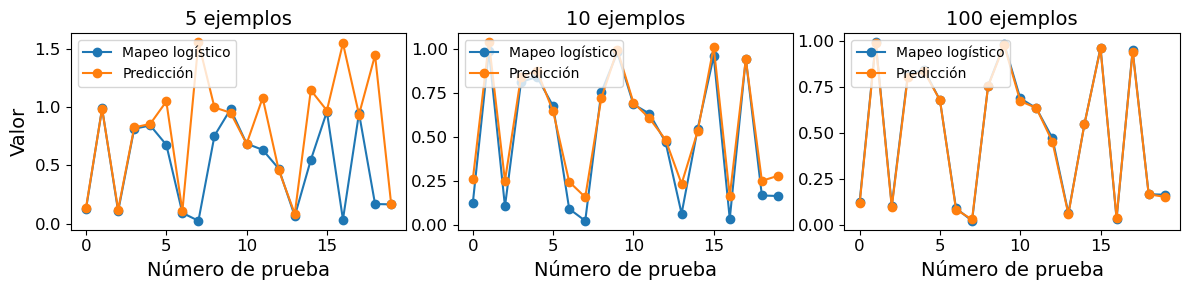

In [85]:
np.random.seed(4)

x_prueba = np.random.rand(20).reshape(20,1)
Y_prueba = map_logistico(x_prueba)

fig, axs = plt.subplots(1, 3, figsize=(12, 3))
Y_red_5 = model_5.predict(x_prueba)
axs[0].plot(Y_prueba, 'o-', label='Mapeo logístico')
axs[0].plot(Y_red_5, 'o-', label='Predicción')
axs[0].set_xlabel('Número de prueba', fontsize=14)
axs[0].set_ylabel('Valor', fontsize=14)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].set_title('5 ejemplos', fontsize=14)
axs[0].legend()

Y_red_10 = model_10.predict(x_prueba)
axs[1].plot(Y_prueba, 'o-', label='Mapeo logístico')
axs[1].plot(Y_red_10, 'o-', label='Predicción')
axs[1].set_xlabel('Número de prueba', fontsize=14)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_title('10 ejemplos', fontsize=14)
axs[1].legend(loc='upper left')

Y_red_100 = model_100.predict(x_prueba)
axs[2].plot(Y_prueba, 'o-', label='Mapeo logístico')
axs[2].plot(Y_red_100, 'o-', label='Predicción')
axs[2].set_xlabel('Número de prueba', fontsize=14)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].set_title('100 ejemplos', fontsize=14)
axs[2].legend(loc='upper left')


plt.tight_layout()

#plt.savefig('/Users/manuchito/Documents/Balseiro/Redes neuronales/Práctica 4/figuras/3_ejemplos.png', dpi=900, bbox_inches='tight')